In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import sklearn

In [4]:
import keras

Using TensorFlow backend.


In [5]:
from keras.models import Sequential

In [6]:
from keras.layers import Dense

In [7]:
from tensorflow.examples.tutorials.mnist import input_data

In [8]:
DATAS=input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [9]:
X_train=DATAS.train.images

In [10]:
y_train=DATAS.train.labels

In [11]:
X_test=DATAS.test.images
y_test=DATAS.test.labels

In [11]:
model=Sequential()

In [12]:
model.add(Dense(32,input_dim=784,activation='relu'))

In [23]:
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

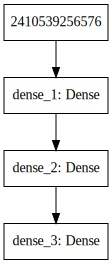

In [24]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [22]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,to_file='model.png')

In [27]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
55000/55000 [==============================] - 2s 36us/step - loss: 1.5880 - acc: 0.8467
Epoch 2/20
55000/55000 [==============================] - 2s 32us/step - loss: 0.8791 - acc: 0.9555
Epoch 3/20
55000/55000 [==============================] - 2s 31us/step - loss: 0.5546 - acc: 0.9572
Epoch 4/20
55000/55000 [==============================] - 2s 31us/step - loss: 0.4061 - acc: 0.9583
Epoch 5/20
55000/55000 [==============================] - 2s 32us/step - loss: 0.3277 - acc: 0.9605
Epoch 6/20
55000/55000 [==============================] - 2s 31us/step - loss: 0.2809 - acc: 0.9616
Epoch 7/20
55000/55000 [==============================] - 2s 32us/step - loss: 0.2492 - acc: 0.9631
Epoch 8/20
55000/55000 [==============================] - 2s 32us/step - loss: 0.2268 - acc: 0.9640
Epoch 9/20
55000/55000 [==============================] - 2s 34us/step - loss: 0.2096 - acc: 0.9655
Epoch 10/20
55000/55000 [==============================] - 2s 34us/step - loss: 0.1956 - acc: 0.9667

In [28]:
loss_and_metrics=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 21us/step


In [20]:
loss_and_metrics

[0.1563457353912294, 0.9533]

In [29]:
loss_and_metrics

[0.1686404246389866, 0.9614]

In [31]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

# Generate dummy data
x_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
100/100 [==============================] - 5s 49ms/step - loss: 2.3257
Epoch 2/10
100/100 [==============================] - 4s 38ms/step - loss: 2.3481
Epoch 3/10
100/100 [==============================] - 4s 38ms/step - loss: 2.2928
Epoch 4/10
100/100 [==============================] - 4s 38ms/step - loss: 2.2858
Epoch 5/10
100/100 [==============================] - 4s 38ms/step - loss: 2.2683
Epoch 6/10
100/100 [==============================] - 4s 38ms/step - loss: 2.3105
Epoch 7/10
100/100 [==============================] - 4s 38ms/step - loss: 2.3099
Epoch 8/10
100/100 [==============================] - 4s 38ms/step - loss: 2.2768
Epoch 9/10
100/100 [==============================] - 4s 39ms/step - loss: 2.2936
Epoch 10/10
20/20 [==============================] - 1s 39ms/step


In [33]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='conv2d.png')

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 3s 3ms/step - loss: 11.5141 - acc: 0.1090 - val_loss: 11.8979 - val_acc: 0.1300
Epoch 2/5
1000/1000 [==============================] - 0s 262us/step - loss: 11.5128 - acc: 0.1090 - val_loss: 11.8969 - val_acc: 0.1200
Epoch 3/5
1000/1000 [==============================] - 0s 209us/step - loss: 11.5126 - acc: 0.1200 - val_loss: 11.8949 - val_acc: 0.1300
Epoch 4/5
1000/1000 [==============================] - 0s 221us/step - loss: 11.5117 - acc: 0.1120 - val_loss: 11.8954 - val_acc: 0.0600
Epoch 5/5
1000/1000 [==============================] - 0s 186us/step - loss: 11.5111 - acc: 0.1220 - val_loss: 11.8962 - val_acc: 0.1500


In [36]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='lstm.png')

In [41]:
from keras.layers import Conv2D,MaxPooling2D,Flatten

In [155]:
from keras.layers import Dropout

In [43]:
X_train.shape,y_train.shape

((55000, 784), (1000, 10))

In [44]:
X_test.shape,y_test.shape

((10000, 784), (20, 10))

In [45]:
y_train=DATAS.train.labels
y_test=DATAS.test.labels

In [46]:
y_train.shape,y_test.shape

((55000, 10), (10000, 10))

In [198]:
model=Sequential()

In [199]:
model.add(Conv2D(32,(2,2),padding='same',activation='relu',input_shape=(28,28,1)))

In [200]:
model.add(MaxPooling2D((2,2),strides=(2,2),padding='same'))

In [201]:
model.add(Conv2D(64,(2,2),padding='same',activation='relu'))

In [202]:
model.add(MaxPooling2D((2,2),strides=(2,2),padding='same'))

In [203]:
model.add(Flatten())

In [204]:
model.add(Dense(1024,activation='relu'))

In [205]:
model.add(Dropout(rate=0.5))

In [206]:
model.add(Dense(10,activation='softmax'))

In [207]:
from keras.optimizers import SGD

In [208]:
sgd=SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)

In [209]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [210]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='try_cnn.png')

In [211]:
model.fit(X_train.reshape(-1,28,28,1),y_train,epochs=5)

Epoch 1/5
55000/55000 [==============================] - 1016s 18ms/step - loss: 0.2651 - acc: 0.9157
Epoch 2/5
55000/55000 [==============================] - 1017s 18ms/step - loss: 0.0862 - acc: 0.9726
Epoch 3/5
55000/55000 [==============================] - 918s 17ms/step - loss: 0.0599 - acc: 0.9812
Epoch 4/5
55000/55000 [==============================] - 909s 17ms/step - loss: 0.0480 - acc: 0.9849
Epoch 5/5
55000/55000 [==============================] - 912s 17ms/step - loss: 0.0390 - acc: 0.9874


In [213]:
model.evaluate(X_test.reshape(-1,28,28,1)[:1000,:,:,:],y_test[:1000])

1000/1000 [==============================] - 0s 412us/step


[0.04233231209218502, 0.983]

In [172]:
from keras.layers import LSTM

In [189]:
model_lstm=Sequential()

In [190]:
model_lstm.add(LSTM(32,return_sequences=True,input_shape=(28,28)))

In [191]:
model_lstm.add(LSTM(32,return_sequences=True))

In [192]:
model_lstm.add(LSTM(32))

In [193]:
model_lstm.add(Dense(10,activation='softmax'))

In [194]:
model_lstm.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [195]:
plot_model(model_lstm,show_shapes=True,to_file='try_lstm.png')

In [196]:
model_lstm.fit(X_train.reshape(-1,28,28),y_train,epochs=5)

Epoch 1/5
55000/55000 [==============================] - 58s 1ms/step - loss: 0.5954 - acc: 0.8085: 0s - loss: 0.5991 -
Epoch 2/5
55000/55000 [==============================] - 53s 960us/step - loss: 0.1911 - acc: 0.9430
Epoch 3/5
55000/55000 [==============================] - 53s 956us/step - loss: 0.1229 - acc: 0.9635
Epoch 4/5
55000/55000 [==============================] - 54s 980us/step - loss: 0.0892 - acc: 0.9735
Epoch 5/5
55000/55000 [==============================] - 53s 964us/step - loss: 0.0730 - acc: 0.9787


In [187]:
model_lstm.evaluate(X_test.reshape(-1,28,28),y_test)

10000/10000 [==============================] - 3s 283us/step


[0.18842802984714507, 0.9434]

In [197]:
model_lstm.evaluate(X_test.reshape(-1,28,28),y_test)

10000/10000 [==============================] - 3s 261us/step


[0.06489395804777741, 0.9805]

In [13]:
X_train.shape

(55000, 784)

In [14]:
X_train_img=X_train.reshape(-1,28,28)

In [26]:
from keras.utils import plot_model

In [22]:
from keras.layers import LSTM

In [80]:
from keras.layers import Dropout

In [81]:
from keras.layers import BatchNormalization

In [16]:
import matplotlib.pyplot as plt

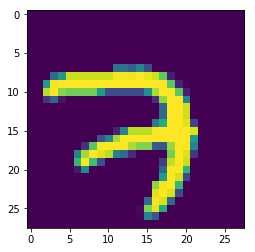

In [18]:
plt.imshow(X_train_img[0])

In [19]:
X_test_img=X_test.reshape(-1,28,28)

In [125]:
model=Sequential()

In [126]:
model.add(Dense(100,activation='relu',input_shape=(28,28)))

In [127]:
model.add(BatchNormalization())

In [128]:
model.add(LSTM(50))

In [129]:
model.add(Dropout(rate=0.5))

In [130]:
model.add(Dense(10,activation='softmax'))

In [131]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [118]:
plot_model(model,show_shapes=True,to_file='get_w.png')

In [132]:
result=model.fit(X_train_img,y_train,epochs=80,batch_size=500,validation_split=0.25,verbose=1)

Train on 41250 samples, validate on 13750 samples
Epoch 1/80
41250/41250 [==============================] - 15s 372us/step - loss: 2.2507 - acc: 0.1627 - val_loss: 2.1532 - val_acc: 0.2856
Epoch 2/80
41250/41250 [==============================] - 14s 334us/step - loss: 2.1263 - acc: 0.2570 - val_loss: 2.0328 - val_acc: 0.4153
Epoch 3/80
41250/41250 [==============================] - 14s 342us/step - loss: 2.0154 - acc: 0.3181 - val_loss: 1.9137 - val_acc: 0.4844
Epoch 4/80
41250/41250 [==============================] - 13s 326us/step - loss: 1.9038 - acc: 0.3634 - val_loss: 1.7916 - val_acc: 0.5190
Epoch 5/80
41250/41250 [==============================] - 13s 326us/step - loss: 1.7982 - acc: 0.3966 - val_loss: 1.6725 - val_acc: 0.5474
Epoch 6/80
41250/41250 [==============================] - 13s 326us/step - loss: 1.6948 - acc: 0.4356 - val_loss: 1.5576 - val_acc: 0.5777
Epoch 7/80
41250/41250 [==============================] - 14s 329us/step - loss: 1.5951 - acc: 0.4751 - val_loss: 1.

41250/41250 [==============================] - 15s 371us/step - loss: 0.2618 - acc: 0.9321 - val_loss: 0.2086 - val_acc: 0.9395
Epoch 60/80
41250/41250 [==============================] - 15s 358us/step - loss: 0.2555 - acc: 0.9341 - val_loss: 0.2031 - val_acc: 0.9409
Epoch 61/80
41250/41250 [==============================] - 15s 359us/step - loss: 0.2517 - acc: 0.9353 - val_loss: 0.2187 - val_acc: 0.9376
Epoch 62/80
41250/41250 [==============================] - 15s 363us/step - loss: 0.2480 - acc: 0.9360 - val_loss: 0.2225 - val_acc: 0.9352
Epoch 63/80
41250/41250 [==============================] - 15s 366us/step - loss: 0.2464 - acc: 0.9370 - val_loss: 0.1985 - val_acc: 0.9413
Epoch 64/80
41250/41250 [==============================] - 15s 362us/step - loss: 0.2392 - acc: 0.9393 - val_loss: 0.2078 - val_acc: 0.9398
Epoch 65/80
41250/41250 [==============================] - 15s 362us/step - loss: 0.2345 - acc: 0.9400 - val_loss: 0.1859 - val_acc: 0.9458
Epoch 66/80
41250/41250 [=======

In [135]:
dir(result.history.values)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

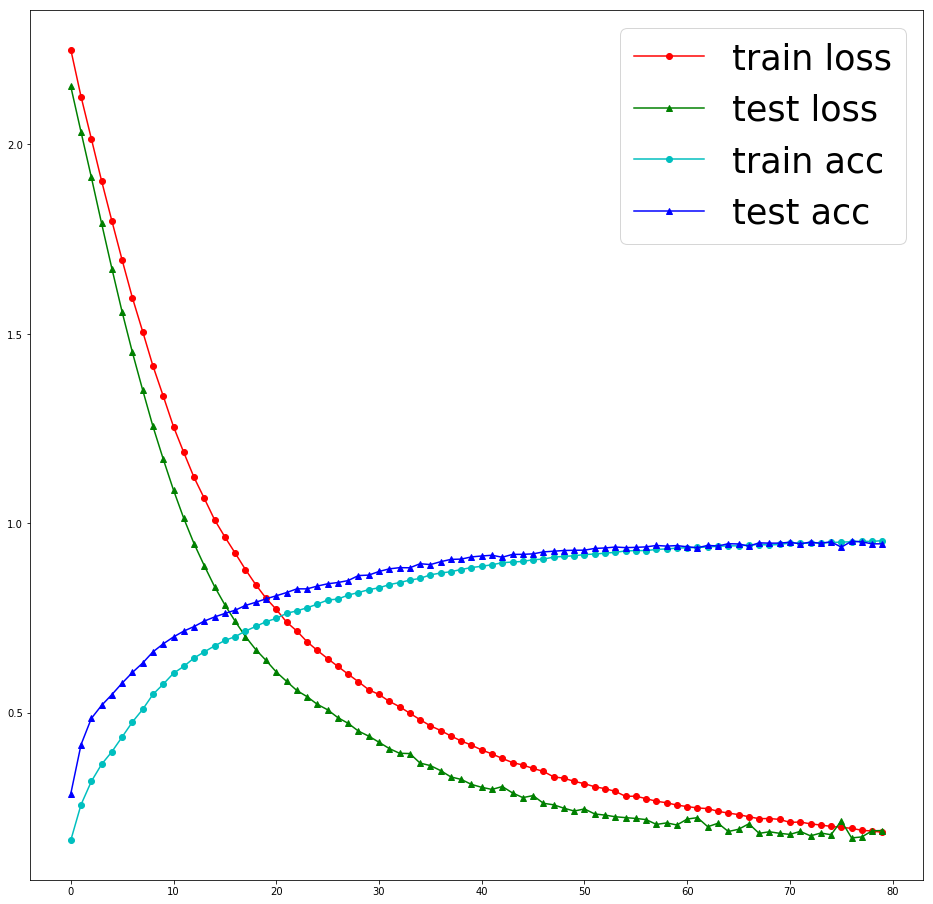

In [149]:
fig=plt.figure()
ax=plt.gca()
fig.set_size_inches(16,16)
ax.plot(result.history['loss'],'o-',color='r')
ax.plot(result.history['val_loss'],'^-',color='g')
ax.plot(result.history['acc'],'o-',color='c')
ax.plot(result.history['val_acc'],'^-',color='b')
ax.legend(['train loss','test loss','train acc','test acc'],fontsize=35)

In [121]:
for i in range(3):
    model.fit(X_train_img,y_train,epochs=5)
    print(model.evaluate(X_test_img,y_test))

Epoch 1/5
55000/55000 [==============================] - 36s 654us/step - loss: 1.4670 - acc: 0.49790s - loss: 1.4734 - acc
Epoch 2/5
55000/55000 [==============================] - 34s 615us/step - loss: 0.6226 - acc: 0.8063
Epoch 3/5
55000/55000 [==============================] - 34s 620us/step - loss: 0.3760 - acc: 0.8931
Epoch 4/5
55000/55000 [==============================] - 34s 616us/step - loss: 0.2757 - acc: 0.9258
Epoch 5/5
10000/10000 [==============================] - 2s 193us/step
[0.17008726871311663, 0.9482]
Epoch 1/5
55000/55000 [==============================] - 34s 613us/step - loss: 0.1884 - acc: 0.9510
Epoch 2/5
55000/55000 [==============================] - 34s 624us/step - loss: 0.1652 - acc: 0.9564
Epoch 3/5
55000/55000 [==============================] - 34s 622us/step - loss: 0.1452 - acc: 0.9627
Epoch 4/5
55000/55000 [==============================] - 35s 639us/step - loss: 0.1382 - acc: 0.96450s - loss: 0.1384 - acc:
Epoch 5/5
10000/10000 [=====================

In [122]:
for i in range(5):
    print('the %d layer: ' %i,np.array(model.layers[i].get_weights()).shape)

the 0 layer:  (2,)
the 1 layer:  (4, 100)
the 2 layer:  (3,)
the 3 layer:  (0,)
the 4 layer:  (2,)


In [77]:
for i in range(3):
    print(model.layers[1].get_weights()[i].shape)

(100, 80)
(20, 80)
(80,)


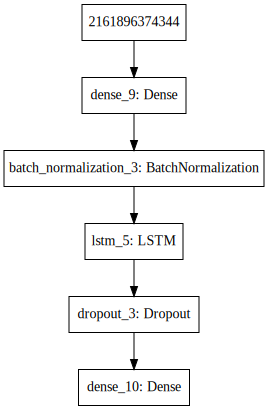

In [120]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [152]:
from keras.layers import Input
from keras.models import Model

In [155]:
from keras.layers import Conv2D

In [156]:
from keras.layers import MaxPooling2D

In [157]:
from keras.layers import Flatten

In [160]:
inputs=Input(shape=(28,28,1))

In [164]:
conv_1=Conv2D(32,(2,2),padding='same',activation='relu')(inputs)

In [165]:
pooled_1=MaxPooling2D((2,2),padding='same')(conv_1)

In [166]:
normed_1=BatchNormalization()(pooled_1)

In [168]:
conv_2=Conv2D(64,(2,2),padding='same',activation='relu')(normed_1)

In [169]:
pooled_2=MaxPooling2D((2,2),padding='same')(conv_2)

In [170]:
normed_2=BatchNormalization()(pooled_2)

In [171]:
flatted=Flatten()(normed_2)

In [172]:
ful_con_1=Dense(1024,activation='relu')(flatted)

In [173]:
ful_con_2=Dense(10,activation='softmax')(ful_con_1)

In [227]:
func_model=Model(inputs=inputs,outputs=ful_con_2)

In [175]:
plot_model(func_model,show_shapes=True,to_file='func_model.png')

In [309]:
func_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])

In [184]:
func_result=func_model.fit(X_train_img[:,:,:,np.newaxis],y_train,validation_split=0.25,epochs=3)

Train on 41250 samples, validate on 13750 samples
Epoch 1/3
41250/41250 [==============================] - 108s 3ms/step - loss: 0.1453 - acc: 0.9573 - val_loss: 0.0735 - val_acc: 0.9791
Epoch 2/3
41250/41250 [==============================] - 103s 2ms/step - loss: 0.0508 - acc: 0.9857 - val_loss: 0.0693 - val_acc: 0.9782
Epoch 3/3
41250/41250 [==============================] - 105s 3ms/step - loss: 0.0333 - acc: 0.9902 - val_loss: 0.0561 - val_acc: 0.9832


In [185]:
func_model.save('my_func_model.h5')

In [186]:
del func_model

In [188]:
from keras.models import load_model

In [189]:
func_model=load_model('my_func_model.h5')

In [190]:
func_result=func_model.fit(X_train_img[:,:,:,np.newaxis],y_train,validation_split=0.25,epochs=1)

Train on 41250 samples, validate on 13750 samples
Epoch 1/1
41250/41250 [==============================] - 103s 2ms/step - loss: 0.0235 - acc: 0.9940 - val_loss: 0.0547 - val_acc: 0.9833


In [205]:
from keras.models import model_from_json

In [275]:
func_model_json=func_model.to_json()

In [276]:
func_model_yaml=func_model.to_yaml()

In [277]:
with open('fun_model_json_3.json','w') as json_file:
    json_file.write(func_model_json)

In [278]:
with open('func_model_yaml_3.yaml','w') as yaml_file:
    yaml_file.write(func_model_yaml)

In [328]:
del func_model

In [329]:
model_json_file=open('fun_model_json_3.json','r')

In [330]:
model_from_file=model_json_file.read()

In [331]:
model_json_file.close()

In [332]:
func_model=model_from_json(model_from_file)

In [333]:
func_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
func_result=func_model.fit(X_train_img[:1000,:,:,np.newaxis],y_train[:1000],validation_split=0.25,epochs=1)

Train on 750 samples, validate on 250 samples
Epoch 1/1
750/750 [==============================] - 4s 6ms/step - loss: 1.0684 - acc: 0.6773 - val_loss: 0.8643 - val_acc: 0.7040


In [320]:
func_model.save_weights('func_model_weight.h5')

In [326]:
func_model.load_weights('func_model_weight.h5')

In [327]:
func_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
func_result=func_model.fit(X_train_img[:1000,:,:,np.newaxis],y_train[:1000],validation_split=0.25,epochs=1)

Train on 750 samples, validate on 250 samples
Epoch 1/1
750/750 [==============================] - 4s 5ms/step - loss: 0.1332 - acc: 0.9813 - val_loss: 0.3140 - val_acc: 0.9360
